In [ ]:
%cd data

In [2]:
%ls

LICENSE.txt                 glove.twitter.27B.zip
README.md                   glove.twitter.27B.zip.1
class                       images
dev.jsonl                   img/
glove.twitter.27B.100d.txt  test.jsonl
glove.twitter.27B.200d.txt  text
glove.twitter.27B.25d.txt   train.csv
glove.twitter.27B.50d.txt   train.jsonl


In [3]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('train.csv')
df.head()

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."


In [6]:
sdf1=df[df['label'].eq(0)].sample(1900)
sdf1.reset_index(drop=True)
tdf1=sdf1[-400:]
sdf1=sdf1[:-400]

In [7]:
sdf2=df[df['label'].eq(1)].sample(700)
sdf2.reset_index(drop=True)
tdf2=sdf2[-200:]
sdf2=sdf2[:-200]

In [8]:
sdf=pd.concat([sdf1,sdf2],axis=0)
tdf=pd.concat([tdf1,tdf2],axis=0)

In [9]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 7082 to 4442
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   img     2000 non-null   object
 2   label   2000 non-null   int64 
 3   text    2000 non-null   object
dtypes: int64(2), object(2)
memory usage: 78.1+ KB


In [10]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 4694 to 8139
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      600 non-null    int64 
 1   img     600 non-null    object
 2   label   600 non-null    int64 
 3   text    600 non-null    object
dtypes: int64(2), object(2)
memory usage: 23.4+ KB


In [41]:
sdf=sdf.sample(frac=1)
tdf=tdf.sample(frac=1)
sdf=sdf.reset_index(drop=True)
tdf=tdf.reset_index(drop=True)

In [12]:
# !wget http://nlp.stanford.edu/data/glove.twitter.27B.zip

--2020-09-22 23:33:00--  http://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.twitter.27B.zip [following]
--2020-09-22 23:33:00--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2020-09-22 23:33:02--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [appli

In [39]:
# import zipfile
# zip = zipfile.ZipFile('glove.twitter.27B.zip')
# zip.extractall()

In [4]:
embeddings_index = {}
f = open('glove.twitter.27B.25d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors in pretrained word vector model.' % len(embeddings_index))
print('Dimensions of the vector space : ', len(embeddings_index['the']))

Found 1193514 word vectors in pretrained word vector model.
Dimensions of the vector space :  25


In [5]:
import cv2
import pickle
import os

In [42]:
sdf.head()

,id,img,label,text
0,56418,img/56418.png,0,notice the difference talk show host vietnam w...
1,15062,img/15062.png,0,"this is vitiligo, the same disease that michae..."
2,87120,img/87120.png,0,islam's trojan horse the the only reason truth...
3,20485,img/20485.png,0,friendly reminder: a hooker and con man are in...
4,91768,img/91768.png,0,wtf am i wearing


In [44]:
# imglist=[]
# textlist =[]
# classlist = []
# for i in range(len(sdf['img'])):
# #     print(sdf['img'][i])
#     img=cv2.imread(sdf['img'][i])
#     img=cv2.resize(img,(128,128))
#     imglist.append(img)
#     textlist.append(sdf['text'][i])
#     classlist.append(sdf['label'][i])

In [31]:
# cv2.imshow("image",imglist[0])
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [45]:
# import pickle 

# filename='images'
# outfile=open(filename,'wb')
# pickle.dump(imglist,outfile)
# outfile.close()

# filename='text'
# outfile=open(filename,'wb')
# pickle.dump(textlist,outfile)
# outfile.close()

# filename='class'
# outfile=open(filename,'wb')
# pickle.dump(classlist,outfile)
# outfile.close()

In [6]:
import pickle
infile=open('images','rb')
imglist=pickle.load(infile)
infile.close()

infile=open('text','rb')
textlist=pickle.load(infile)
infile.close()

infile=open('class','rb')
classlist=pickle.load(infile)
infile.close()


In [7]:
len(textlist)

2000

In [8]:
imglist=np.asarray(imglist)
imglist.shape

(2000, 128, 128, 3)

In [9]:
textlist=np.asarray(textlist)

In [10]:
class2=np.asarray(classlist)
from collections import Counter
print(Counter(classlist))

Counter({0: 1500, 1: 500})


In [13]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(class2)

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

num_words = 500
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')
tokenizer.fit_on_texts(textlist)
X = tokenizer.texts_to_sequences(textlist)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

max_length_of_text = 40
X = pad_sequences(X, maxlen=max_length_of_text)

print(word_index)

Found 4400 unique tokens.
{'the': 1, 'you': 2, 'a': 3, 'to': 4, 'i': 5, 'and': 6, 'when': 7, 'is': 8, 'of': 9, 'in': 10, 'your': 11, 'my': 12, 'for': 13, 'it': 14, 'this': 15, 'me': 16, 'are': 17, 'that': 18, 'with': 19, 'like': 20, 'but': 21, 'not': 22, 'on': 23, 'have': 24, 'they': 25, 'people': 26, 'be': 27, 'what': 28, 'if': 29, 'so': 30, 'we': 31, "i'm": 32, "you're": 33, 'do': 34, 'at': 35, 'all': 36, "don't": 37, 'just': 38, 'up': 39, "it's": 40, 'get': 41, 'no': 42, 'how': 43, 'out': 44, 'was': 45, 'one': 46, 'can': 47, 'black': 48, 'white': 49, 'from': 50, 'see': 51, 'about': 52, 'them': 53, 'she': 54, 'will': 55, 'he': 56, 'an': 57, 'as': 58, 'his': 59, 'their': 60, "can't": 61, 'why': 62, 'day': 63, 'muslim': 64, 'shit': 65, 'know': 66, 'fuck': 67, 'look': 68, 'make': 69, 'who': 70, 'time': 71, 'man': 72, 'there': 73, 'only': 74, 'now': 75, 'has': 76, 'her': 77, 'or': 78, 'am': 79, 'love': 80, 'after': 81, 'want': 82, 'because': 83, 'muslims': 84, 'then': 85, 'our': 86, 'tru

In [17]:
import pickle
filename='tokenizer'
outfile=open(filename,'wb')
pickle.dump(tokenizer,outfile)
outfile.close()

In [18]:
EMBEDDING_DIM = 25
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [19]:
from keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=max_length_of_text,
                            trainable=True)

In [20]:
X_train=X
X_train_images=np.asarray(imglist)
X_train_images=X_train_images/255.0

In [21]:
X_train_images.shape,X_train.shape,y_train.shape

((2000, 128, 128, 3), (2000, 40), (2000, 2))

In [22]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(class2),
                                                 class2)
class_weights

array([0.66666667, 2.        ])

In [43]:
from keras.layers import Input, Embedding, LSTM, Dense, GRU, Bidirectional, BatchNormalization, Flatten, Dropout
from keras.models import Model
import keras

In [44]:
main_input=Input(shape=(40,))
x=embedding_layer(main_input)
lstm_out=Bidirectional(LSTM(100,return_sequences=True))(x)
lstm_out=Flatten()(lstm_out)
lstm_out=Dense(1024,activation='relu')(lstm_out)

In [45]:
from keras.applications import VGG16
conv_base2=VGG16(include_top=False, weights='imagenet', input_shape=(128,128,3) ,classes=2)

In [46]:
conv_base2.trainable = False
aux_input=Input(shape=(128,128,3,))
y=conv_base2(aux_input)
y=Flatten()(y)
y=Dense(1024,activation='relu')(y)
y=Dropout(0.2)(y)

In [47]:
final_x=keras.layers.Concatenate()([lstm_out,y])

In [48]:
final_x=Dense(256,activation='relu')(final_x)
final_x=Dropout(0.2)(final_x)
final_x=Dense(128,activation='relu')(final_x)
final_x=Dropout(0.2)(final_x)
final_x=Dense(64,activation='relu')(final_x)
main_out=Dense(2,activation='softmax')(final_x)

In [49]:
model = Model(inputs=[main_input, aux_input], outputs=[main_out])

In [50]:
optimizer=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 25)       110025      input_6[0][0]                    
__________________________________________________________________________________________________
vgg16 (Functional)              (None, 4, 4, 512)    14714688    input_8[0][0]                    
_______________________________________________________________________________________

In [52]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [53]:
hist=model.fit([X_train,X_train_images],y_train,epochs=10,batch_size=64,validation_split=0.2,workers=0)

Epoch 1/10
25/25 [==============================] - 52s 2s/step - loss: 0.7424 - accuracy: 0.6612 - val_loss: 0.5496 - val_accuracy: 0.7775
Epoch 2/10
25/25 [==============================] - 71s 3s/step - loss: 0.6196 - accuracy: 0.7181 - val_loss: 0.5452 - val_accuracy: 0.7775
Epoch 3/10
25/25 [==============================] - 73s 3s/step - loss: 0.5867 - accuracy: 0.7425 - val_loss: 0.5277 - val_accuracy: 0.7775
Epoch 4/10
25/25 [==============================] - 79s 3s/step - loss: 0.5675 - accuracy: 0.7381 - val_loss: 0.5170 - val_accuracy: 0.7775
Epoch 5/10
25/25 [==============================] - 80s 3s/step - loss: 0.5265 - accuracy: 0.7444 - val_loss: 0.5147 - val_accuracy: 0.7750
Epoch 6/10
25/25 [==============================] - 76s 3s/step - loss: 0.5077 - accuracy: 0.7650 - val_loss: 0.5272 - val_accuracy: 0.7850
Epoch 7/10
25/25 [==============================] - 80s 3s/step - loss: 0.4303 - accuracy: 0.7887 - val_loss: 0.6636 - val_accuracy: 0.7825
Epoch 8/10
25/25 [==

In [55]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


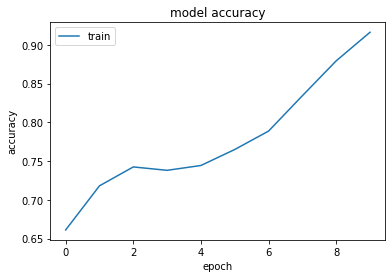

In [56]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

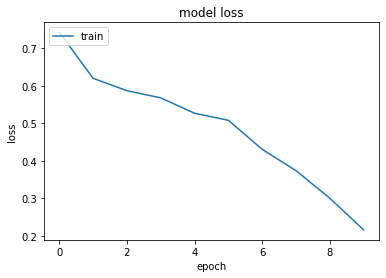

In [57]:
plt.plot(hist.history['loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

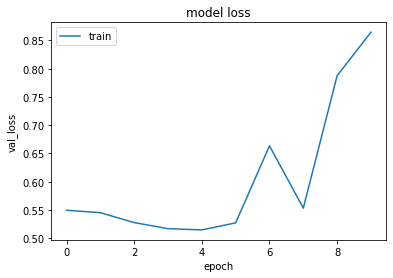

In [58]:
plt.plot(hist.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('val_loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

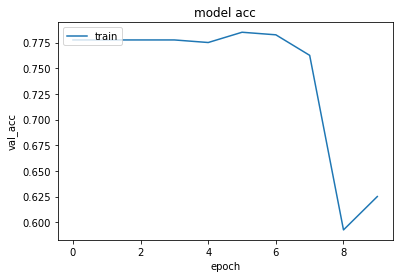

In [60]:
plt.plot(hist.history['val_accuracy'])  
plt.title('model acc')  
plt.ylabel('val_acc')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  